In [35]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency, f_oneway

In [2]:
data = pd.read_csv("Merged Appointment Sheet.csv")
data

,NUMBER,SALES REP,BDC AGENT,SHOWED,U/B,LEAD SOURCE,CUSTOMER NAME,VEHICLE,CONFIRMED,APPT TIME,DATE,DAY OF WEEK,AS-IS,Make,Model,Year
0,1,Jack Scott,Yara,0.0,No,AutoTrader,BRITNEY,Nissan Pathfinder 2009,NO SHOW,11:00:00,2022-01-01,Monday,0,Nissan,Pathfinder,2009
1,2,James Thompson,Leo,1.0,No,Website,DUSFIA,Subaru Forester 2020,CONFIRMED,11:00:00,2022-01-01,Monday,0,Subaru,Forester,2020
2,3,Harper Wright,Vera,1.0,Up,CarGurus,SAGAR,Hyundai Elantra 2005,CONFIRMED,12:00:00,2022-01-01,Monday,0,Hyundai,Elantra,2005
3,4,Lucas Clark,Sophia,1.0,Be Back,CarGurus,SUKHJINDER,Volkswagen Atlas 2002,CONFIRMED,12:00:00,2022-01-01,Monday,0,Volkswagen,Atlas,2002
4,5,Henry Walker,Yara,1.0,No,CarGurus,TALOR,Toyota Corolla 2004,CONFIRMED,13:00:00,2022-01-01,Monday,0,Toyota,Corolla,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18679,18686,Charlotte Adams,Emma,1.0,No,AutoTrader,Giorgi,Nissan Pathfinder 2023,Confirmed,18:00:00,2024-01-31,Wednesday,0,Nissan,Pathfinder,2023
18680,18687,Liam Johnson,Will,0.0,No,AutoTrader,Katrina,Mercedes GLE 2010,NO SHOW,19:00:00,2024-01-31,Wednesday,0,Mercedes,GLE,2010
18681,18688,Charlotte Adams,Liam,0.0,No,Website,jaspreet,Volkswagen Golf 2010,NO SHOW,19:00:00,2024-01-31,Wednesday,0,Volkswagen,Golf,2010
18682,18689,Henry Walker,Liam,0.0,Up,Website,omar,Hyundai Accent 2021,NO SHOW,19:00:00,2024-01-31,Wednesday,0,Hyundai,Accent,2021


In [3]:
# this does not have empty rows as I have cleaned the dataset seperately

In [4]:
# Attendance rate overall
attendance_rate = data['SHOWED'].mean()

# Attendance rate by lead source
attendance_by_lead_source = data.groupby('LEAD SOURCE')['SHOWED'].mean()

# Attendance rate by sales rep
attendance_by_sales_rep = data.groupby('SALES REP')['SHOWED'].mean()

# Attendance rate by day of the week
attendance_by_day = data.groupby('DAY OF WEEK')['SHOWED'].mean()

In [5]:
# Display results

Overall Attendance Rate: 0.6587233586805183


/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_9300/1586714492.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Rate', data=attendance_df, palette="viridis")


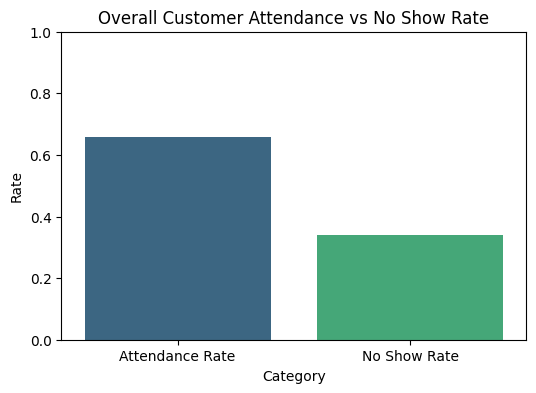

In [6]:
print("Overall Attendance Rate:", attendance_rate)


no_show_rate = 1 - attendance_rate

attendance_data = {
    'Category': ['Attendance Rate', 'No Show Rate'],
    'Rate': [attendance_rate, no_show_rate]
    }
attendance_df = pd.DataFrame(attendance_data)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Rate', data=attendance_df, palette="viridis")
plt.ylim(0, 1)
plt.title('Overall Customer Attendance vs No Show Rate')
plt.ylabel('Rate')
plt.show()


Attendance Rate by Lead Source:
 LEAD SOURCE
AutoTrader        0.655594
CarGurus          0.661786
Dealer            0.683084
FB Marketplace    1.000000
Kijiji            0.653805
Website           0.660244
Wheels            0.650964
Name: SHOWED, dtype: float64


/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_9300/2572523430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attendance_by_lead_source.index, y=attendance_by_lead_source.values, palette="viridis")


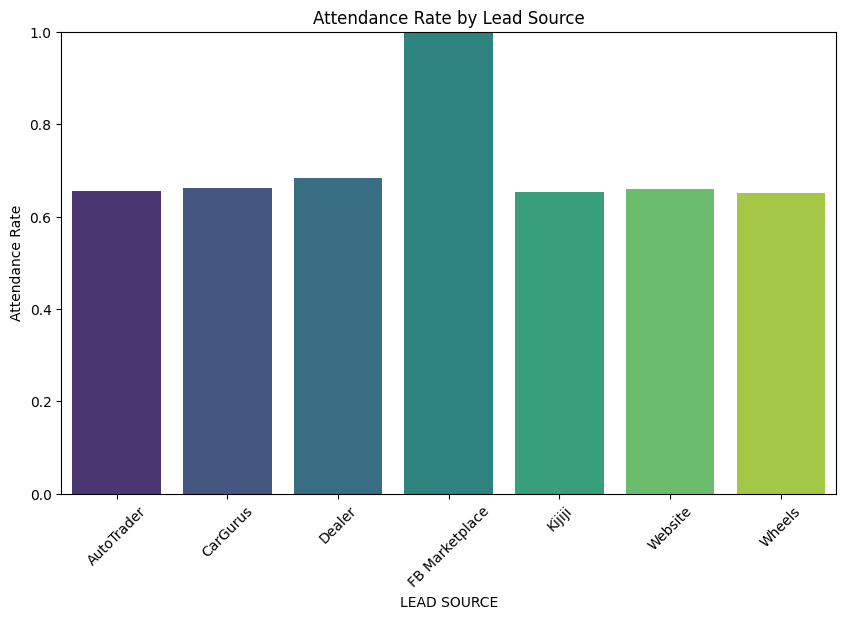

In [7]:
print("\nAttendance Rate by Lead Source:\n", attendance_by_lead_source)

plt.figure(figsize=(10, 6))
sns.barplot(x=attendance_by_lead_source.index, y=attendance_by_lead_source.values, palette="viridis")
plt.title('Attendance Rate by Lead Source')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


Attendance Rate by Day of Week:
 DAY OF WEEK
Friday       0.644483
Monday       0.675961
Saturday     0.640125
Sunday       0.681383
Thursday     0.654942
Tuesday      0.659725
Wednesday    0.669915
Name: SHOWED, dtype: float64


/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_9300/3023326888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attendance_by_day.index, y=attendance_by_day.values, palette="viridis")


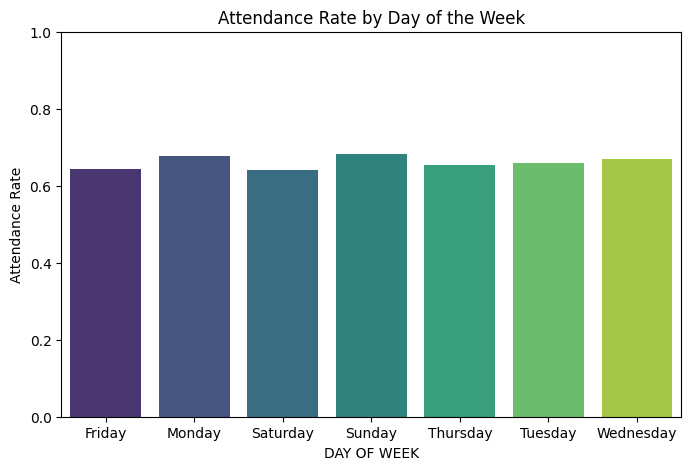

In [8]:
print("\nAttendance Rate by Day of Week:\n", attendance_by_day)

plt.figure(figsize=(8, 5))
sns.barplot(x=attendance_by_day.index, y=attendance_by_day.values, palette="viridis")
plt.title('Attendance Rate by Day of the Week')
plt.ylabel('Attendance Rate')
plt.ylim(0, 1)
plt.show()

In [9]:
# Lead source effectiveness for confirmed appointments
lead_source_confirmation = data[data['CONFIRMED'] == 'CONFIRMED'].groupby('LEAD SOURCE').size()


Lead Source Effectiveness (Confirmed Appointments):
 LEAD SOURCE
AutoTrader        1719
CarGurus          1063
Dealer             188
FB Marketplace       2
Kijiji            1062
Website           2841
Wheels             172
dtype: int64


/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_9300/671490681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lead_source_confirmation.index, y=lead_source_confirmation.values, palette="plasma")


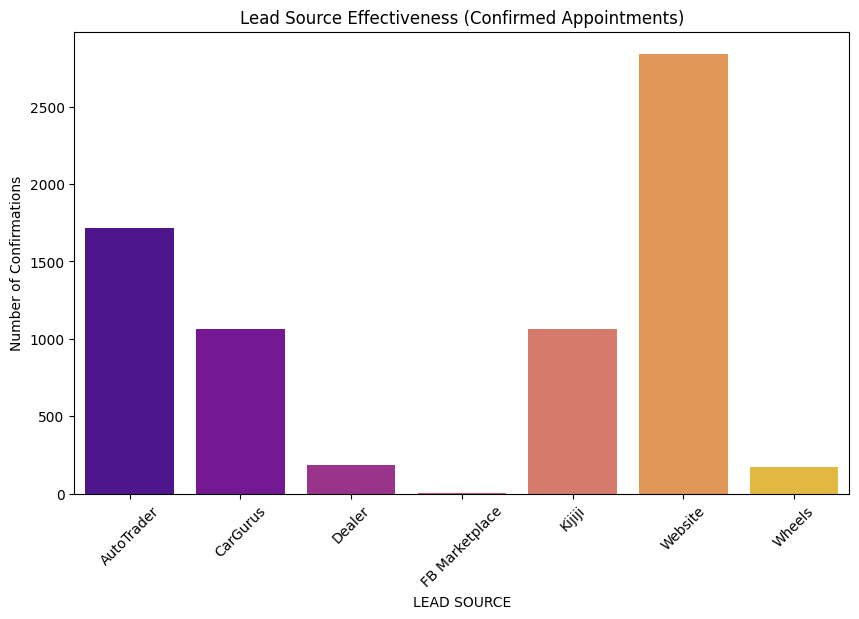

In [10]:
# Results and plot
print("\nLead Source Effectiveness (Confirmed Appointments):\n", lead_source_confirmation)

plt.figure(figsize=(10, 6))
sns.barplot(x=lead_source_confirmation.index, y=lead_source_confirmation.values, palette="plasma")
plt.title('Lead Source Effectiveness (Confirmed Appointments)')
plt.ylabel('Number of Confirmations')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Most popular vehicle makes
popular_makes = data['Make'].value_counts()

# Attendance rate by vehicle make
attendance_by_make = data.groupby('Make')['SHOWED'].mean()

# Number of confirmed appointments by vehicle make
confirmations_by_make = data[data['CONFIRMED'] == 'CONFIRMED'].groupby('Make').size()

In [12]:
# Results


Most Popular Vehicle Makes:
 Make
BMW           1924
Toyota        1918
Mercedes      1917
Chevrolet     1893
Subaru        1867
Honda         1864
Nissan        1836
Volkswagen    1835
Ford          1819
Hyundai       1811
Name: count, dtype: int64


/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_9300/764811852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette="magma")


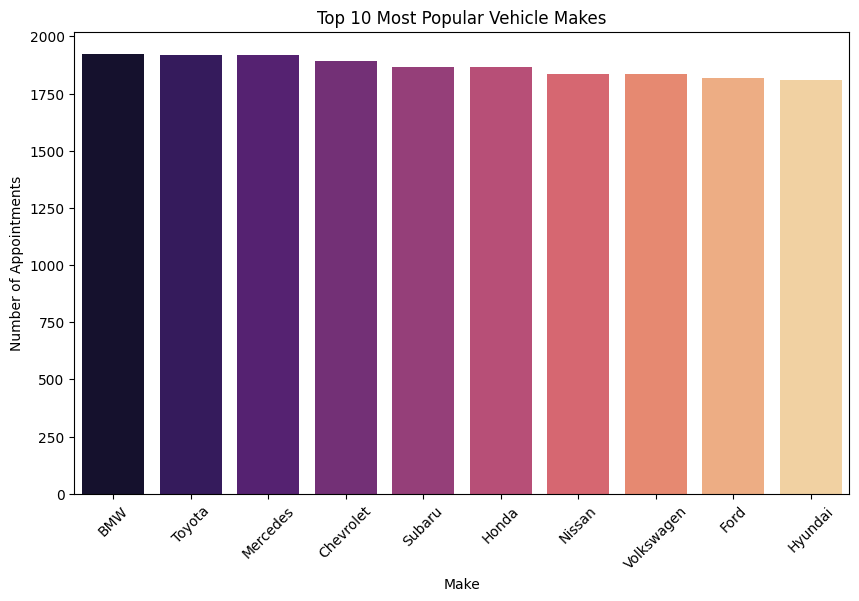

In [13]:
print("\nMost Popular Vehicle Makes:\n", popular_makes)


top_makes = popular_makes.nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette="magma")
plt.title('Top 10 Most Popular Vehicle Makes')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.show()


Attendance Rate by Vehicle Make:
 Make
BMW           0.654186
Chevrolet     0.681313
Ford          0.647577
Honda         0.660944
Hyundai       0.651934
Mercedes      0.639541
Nissan        0.674837
Subaru        0.653990
Toyota        0.653806
Volkswagen    0.669575
Name: SHOWED, dtype: float64


/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_9300/291732112.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_attendance_by_make.index, y=top_attendance_by_make.values, palette="magma")


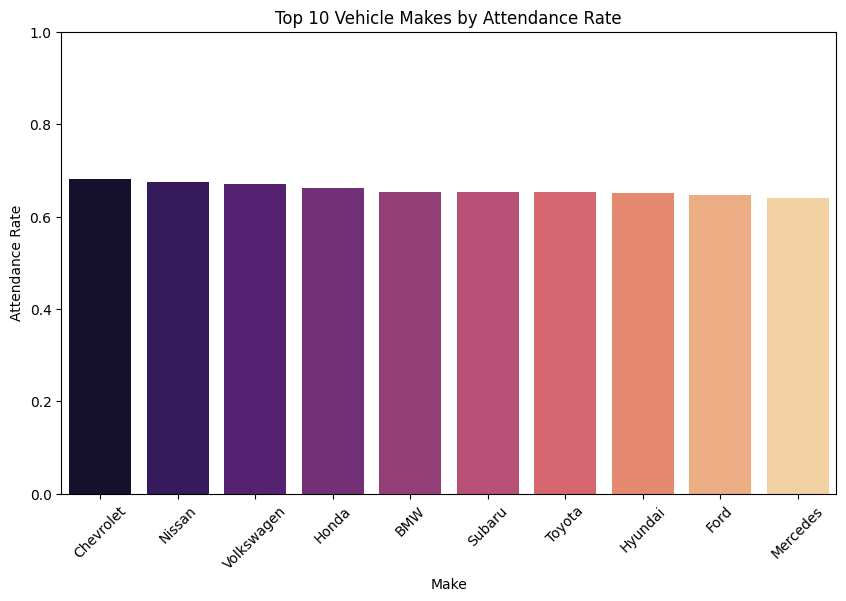

In [14]:
print("\nAttendance Rate by Vehicle Make:\n", attendance_by_make)


# Attendance Rate by Vehicle Make (Top 10)
top_attendance_by_make = attendance_by_make.nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_attendance_by_make.index, y=top_attendance_by_make.values, palette="magma")
plt.title('Top 10 Vehicle Makes by Attendance Rate')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()



Confirmed Appointments by Vehicle Make:
 Make
BMW           726
Chevrolet     707
Ford          696
Honda         704
Hyundai       681
Mercedes      697
Nissan        713
Subaru        698
Toyota        717
Volkswagen    708
dtype: int64


/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_9300/3861393866.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_confirmations_by_make.index, y=top_confirmations_by_make.values, palette="magma")


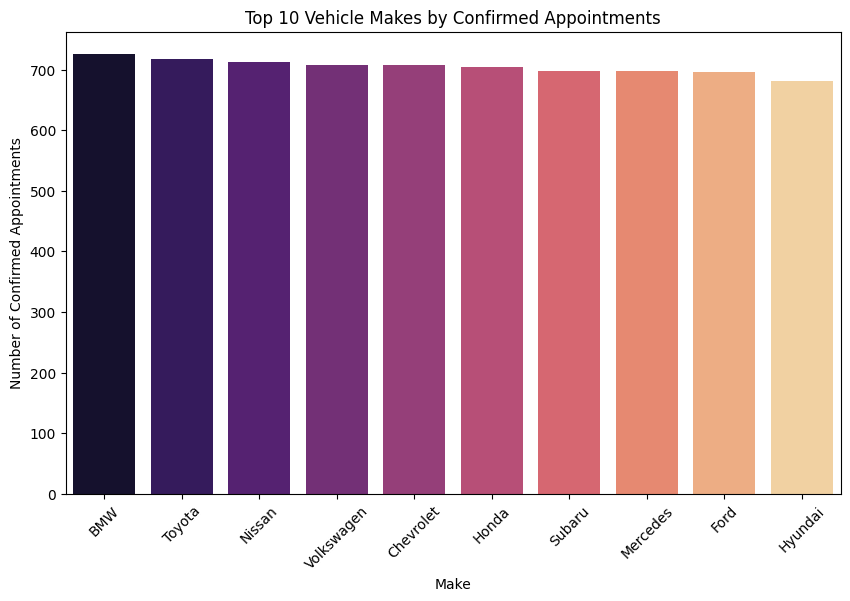

In [17]:
print("\nConfirmed Appointments by Vehicle Make:\n", confirmations_by_make)


top_confirmations_by_make = confirmations_by_make.nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_confirmations_by_make.index, y=top_confirmations_by_make.values, palette="magma")
plt.title('Top 10 Vehicle Makes by Confirmed Appointments')
plt.ylabel('Number of Confirmed Appointments')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Adding appointment hour
data['APPT TIME'] = pd.to_datetime(data['APPT TIME'], errors='coerce', format='%H:%M:%S').dt.time
data['APPT HOUR'] = pd.to_datetime(data['APPT TIME'], format='%H:%M:%S').dt.hour

print(data[['APPT TIME', 'APPT HOUR']].head())

  APPT TIME  APPT HOUR
0  11:00:00       11.0
1  11:00:00       11.0
2  12:00:00       12.0
3  12:00:00       12.0
4  13:00:00       13.0


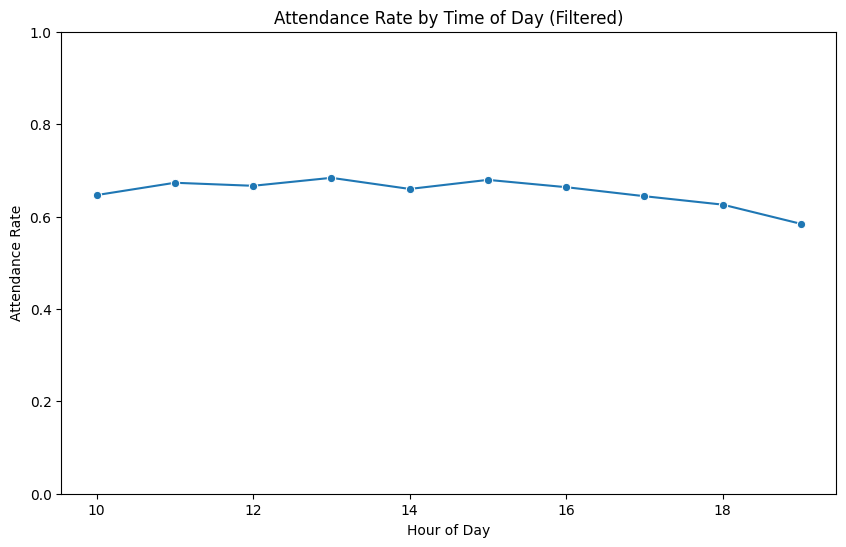

In [27]:
# Filter data to include only appointment times within operating hours 10 to 8 but the appointments were only until 7 marked
data_filtered = data[(data['APPT HOUR'] >= 10) & (data['APPT HOUR'] <= 20)]

time_of_day_attendance_filtered = data_filtered.groupby('APPT HOUR')['SHOWED'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=time_of_day_attendance_filtered.index, y=time_of_day_attendance_filtered.values, marker='o')
plt.title('Attendance Rate by Time of Day (Filtered)')
plt.xlabel('Hour of Day')
plt.ylabel('Attendance Rate')
plt.ylim(0, 1)
plt.show()


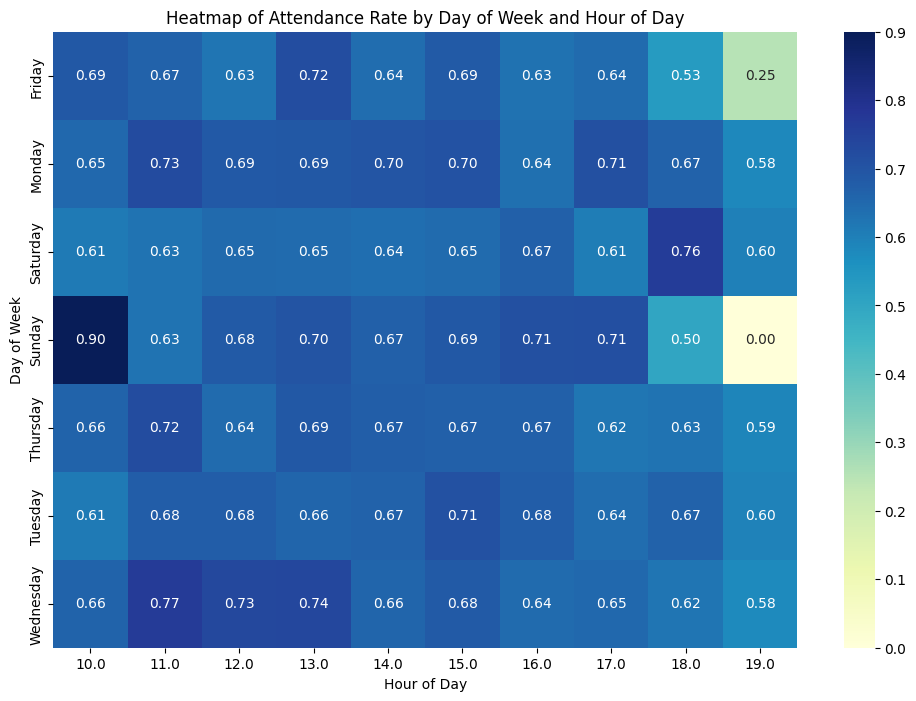

In [26]:
# Filter data to include only appointment times within operating hours 10 to 8 but the appointments were only until 7 marked
data = data[(data['APPT HOUR'] >= 10) & (data['APPT HOUR'] <= 24)]

heatmap_data_filtered = data.pivot_table(index='DAY OF WEEK', columns='APPT HOUR', values='SHOWED', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_filtered, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Attendance Rate by Day of Week and Hour of Day')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.show()


In [32]:
# Example: Compare attendance rates between Monday and Saturday
monday_attendance = data_filtered[data_filtered['DAY OF WEEK'] == 'Monday']['SHOWED']
saturday_attendance = data_filtered[data_filtered['DAY OF WEEK'] == 'Saturday']['SHOWED']

# t-test
t_stat, p_val = ttest_ind(monday_attendance, saturday_attendance, nan_policy='omit')

print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")

# Mann-Whitney U test
u_stat, p_val_u = mannwhitneyu(monday_attendance, saturday_attendance)

print(f"Mann-Whitney U test: U-statistic = {u_stat}, p-value = {p_val_u}")

T-test: t-statistic = 3.043651743411594, p-value = 0.002346182657493175
Mann-Whitney U test: U-statistic = nan, p-value = nan


In [34]:
# Attendance rates between Mondays and Saturdays using both a T-Test and a Mann-Whitney U Test.
# The T-Test revealed a statistically significant difference with a t-statistic of 3.04 and a p-value of 0.002, 
# indicating that the attendance rates between these two days differ meaningfully. 
# The Mann-Whitney U Test, however, could not be properly conducted due to data limitations, 
# suggesting that the non-parametric test was not applicable in this case.
# Overall, the T-Test results strongly suggest that attendance rates vary significantly between Mondays and Saturdays.

In [36]:
# contingency table
contingency_table = pd.crosstab(data_filtered['LEAD SOURCE'], data_filtered['SHOWED'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test: chi2 = {chi2}, p-value = {p}")

Chi-square test: chi2 = 2.892646125710958, p-value = 0.8221952905894526


In [37]:
# Chi-square test to determine if there is a significant association between the lead source and whether customers showed up for their appointments. 
# The test yielded a Chi-square statistic of approximately 2.89 and a p-value of 0.822. 
# Since the p-value is much greater than the common significance level of 0.05, 
# we fail to reject the null hypothesis, indicating that there is no significant association between the lead source and customer attendance. 
# This suggests that the likelihood of a customer showing up is independent of the lead source in this dataset.